In [25]:
import qiskit as q
from distributions import *
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import pi

In [26]:
# Desired distribution

n=4 # number of qubits in register

symmetric = False
 
def desired_distribution(n):
    #return normal_distr(n, sigmas=4)
    return maxwell_boltzmann(n, sigmas=2)

In [27]:
# Circuit definition

def sym_circuit(n, thetas):
    c = q.QuantumCircuit(n)
    for i, theta in enumerate(thetas):
        c.ry(theta, n-1-i)
    for i in range(1,n):
        c.cnot(n-1, n-1-i)
    return c

def asym_circuit(n, thetas):
    c = q.QuantumCircuit(n)
    c.ry(thetas[0], n-1)
    c.x(n-1)
    for i in range(n-1):
        c.cry(thetas[1+i], n-1, n-2-i)
    for i in range(0,n-2):
        c.cnot(n-2, i)
    c.x(n-2)
    return c

In [28]:
# Auxiliary functions

def get_distribution(c):
    simulator = q.Aer.get_backend('statevector_simulator')
    transpiled_circuit = q.transpile(c, simulator)
    result = simulator.run(transpiled_circuit).result()
    statevector = result.get_statevector()

    return [abs(amplitude)**2 for amplitude in statevector]

def norm2(distr1, distr2):
    return np.linalg.norm(np.array(distr1) - np.array(distr2), ord=2)

def plot_distribution(probabilities, n): 
    labels = [bin(i)[2:].zfill(n) for i in range(2**n)] 
    plt.bar(labels, probabilities)
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.title('Probability distribution')
    plt.show()

def compare_plots(p1, p2, n, label1="Obtained", label2="Desired"):
    labels = [bin(i)[2:].zfill(n) for i in range(2**n)]
    plt.bar(labels, p1, alpha=0.5, label=label1)
    plt.bar(labels, p2, alpha=0.5, label=label2)
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.title('Probability distribution')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

In [29]:
# Minimization routine

def minimization_function(thetas):
    if symmetric:
        c = sym_circuit(n, [pi/2,] + list(thetas))
    else:
        c = asym_circuit(n, list(thetas))
    prob = get_distribution(c)
    desired_prob = desired_distribution(n)

    return(norm2(prob, desired_prob))

if symmetric:
    initial_guess = [(2+i)/(3+i)*pi for i in range(n-1)]
else:
    initial_guess = [(1+i)/(2+i)*pi for i in range(n)]

result = minimize(minimization_function, initial_guess, method='COBYLA')

# Print the result
print("Optimal Parameters:", result.x)
print("Optimal Objective Value:", result.fun)

/var/folders/5y/jz3blnc95r73l864rdlw8cth0000gn/T/ipykernel_6679/3436323309.py:9: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  return [abs(amplitude)**2 for amplitude in statevector]


Optimal Parameters: [0.88711333 1.8870966  1.69958718 1.63293357]
Optimal Objective Value: 0.3241620370752208


/var/folders/5y/jz3blnc95r73l864rdlw8cth0000gn/T/ipykernel_6679/3436323309.py:9: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  return [abs(amplitude)**2 for amplitude in statevector]


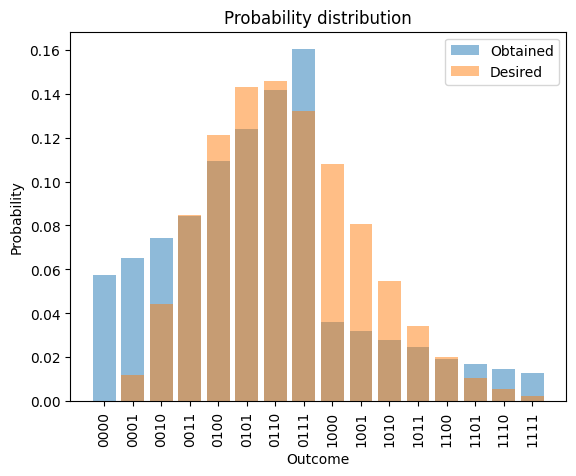

In [30]:
# Plotting result

if symmetric:
    c = sym_circuit(n, [pi/2,] + list(result.x))
else:
    c = sym_circuit(n, list(result.x))
prob = get_distribution(c)
desired_prob = desired_distribution(n)
compare_plots(prob, desired_prob, n)